<div class='alert alert-block alert-info' style="font-size: 20pt; font-family: cursive; color: #08415C"> 
    <b>  <center> Walmart Products </center>
</div>

<div class='alert alert-block alert-info' style="font-size: 14pt; font-family: verdana; color: #08415C"> 
   <center>
            <i style="color: #FB8E7E">A well defined datast with more than 500000 rows. This dataset talks about the items/products present in the walmart stores, their brands and their prices.
I have tried to analyse this dataset as much as I could, with certain limitations. I have used  <b> Bar charts, Horizontal Bar Chart, Line Chart, Pie Chart, defined columns</b>. But this dataset is good for a beginner.</i></center> 
</div>

<div class='alert alert-block alert-warning' style="font-size: 20pt; font-family: cursive; color: #08415C"> 
    <b> <center> 1. Import Libraries </center> </b>
</div>

In [1]:
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
import seaborn as sns
import scipy
import missingno as msno
import warnings 
warnings.filterwarnings('ignore')

In [2]:
# Importing csv file - Walmart Products
df = pd.read_csv(r'C:\Users\iNDIA\Desktop\Data Analytics\Projects\Walmart Products\WMT_Grocery_202209.csv')

In [3]:
# Checking number of rows and columns in the dataset
df.shape

(568534, 16)

In [4]:
# Checking Datatypes of the columns present
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 568534 entries, 0 to 568533
Data columns (total 16 columns):
 #   Column             Non-Null Count   Dtype  
---  ------             --------------   -----  
 0   index              568534 non-null  int64  
 1   SHIPPING_LOCATION  568534 non-null  int64  
 2   DEPARTMENT         568534 non-null  object 
 3   CATEGORY           568534 non-null  object 
 4   SUBCATEGORY        361324 non-null  object 
 5   BREADCRUMBS        568534 non-null  object 
 6   SKU                568534 non-null  int64  
 7   PRODUCT_URL        568534 non-null  object 
 8   PRODUCT_NAME       568534 non-null  object 
 9   BRAND              568507 non-null  object 
 10  PRICE_RETAIL       568534 non-null  float64
 11  PRICE_CURRENT      568534 non-null  float64
 12  PRODUCT_SIZE       505709 non-null  object 
 13  PROMOTION          0 non-null       float64
 14  RunDate            568534 non-null  object 
 15  tid                568534 non-null  int64  
dtypes:

In [5]:
# Checking the content now
df.head()

,index,SHIPPING_LOCATION,DEPARTMENT,CATEGORY,SUBCATEGORY,BREADCRUMBS,SKU,PRODUCT_URL,PRODUCT_NAME,BRAND,PRICE_RETAIL,PRICE_CURRENT,PRODUCT_SIZE,PROMOTION,RunDate,tid
0,0,79936,Deli,"Hummus, Dips, & Salsa",NaN,"Deli/Hummus, Dips, & Salsa",110895339,https://www.walmart.com/ip/Marketside-Roasted-...,"Marketside Roasted Red Pepper Hummus, 10 Oz",Marketside,2.67,2.67,10,NaN,11-09-22 21:20,16163804
1,1,79936,Deli,"Hummus, Dips, & Salsa",NaN,"Deli/Hummus, Dips, & Salsa",105455228,https://www.walmart.com/ip/Marketside-Roasted-...,"Marketside Roasted Garlic Hummus, 10 Oz",Marketside,2.67,2.67,10,NaN,11-09-22 21:20,16163805
2,2,79936,Deli,"Hummus, Dips, & Salsa",NaN,"Deli/Hummus, Dips, & Salsa",128642379,https://www.walmart.com/ip/Marketside-Classic-...,"Marketside Classic Hummus, 10 Oz",Marketside,2.67,2.67,10,NaN,11-09-22 21:20,16163806
3,3,79936,Deli,"Hummus, Dips, & Salsa",NaN,"Deli/Hummus, Dips, & Salsa",366126367,https://www.walmart.com/ip/Marketside-Everythi...,"Marketside Everything Hummus, 10 oz",Marketside,2.67,2.67,10,NaN,11-09-22 21:20,16163807
4,4,79936,Deli,"Hummus, Dips, & Salsa",NaN,"Deli/Hummus, Dips, & Salsa",160090316,https://www.walmart.com/ip/Price-s-Jalapeno-Di...,"Price's Jalapeno Dip, 12 Oz.",Price's,3.12,3.12,12,NaN,11-09-22 21:20,16163808


<div class='alert alert-block alert-warning' style="font-size: 20pt; font-family: cursive; color: #08415C"> 
    <b> <center> 2. Data Wrangling </center> </b>
</div>

#### A. Dropping Columns

In [6]:
df = df.drop(columns = ['SKU', 'PRODUCT_URL', 'PROMOTION', 'RunDate', 'tid'])

In [7]:
# checking new table post deletion of few columns
df.head()

,index,SHIPPING_LOCATION,DEPARTMENT,CATEGORY,SUBCATEGORY,BREADCRUMBS,PRODUCT_NAME,BRAND,PRICE_RETAIL,PRICE_CURRENT,PRODUCT_SIZE
0,0,79936,Deli,"Hummus, Dips, & Salsa",NaN,"Deli/Hummus, Dips, & Salsa","Marketside Roasted Red Pepper Hummus, 10 Oz",Marketside,2.67,2.67,10
1,1,79936,Deli,"Hummus, Dips, & Salsa",NaN,"Deli/Hummus, Dips, & Salsa","Marketside Roasted Garlic Hummus, 10 Oz",Marketside,2.67,2.67,10
2,2,79936,Deli,"Hummus, Dips, & Salsa",NaN,"Deli/Hummus, Dips, & Salsa","Marketside Classic Hummus, 10 Oz",Marketside,2.67,2.67,10
3,3,79936,Deli,"Hummus, Dips, & Salsa",NaN,"Deli/Hummus, Dips, & Salsa","Marketside Everything Hummus, 10 oz",Marketside,2.67,2.67,10
4,4,79936,Deli,"Hummus, Dips, & Salsa",NaN,"Deli/Hummus, Dips, & Salsa","Price's Jalapeno Dip, 12 Oz.",Price's,3.12,3.12,12


#### B. Renaming Columns

Not Required

#### B1. Renaming value in Column - SUBCATEGORY

In [8]:
df.loc[df['SUBCATEGORY'] == 'Shop All', 'SUBCATEGORY'] = 'Shop all'

#### C. Changing data type

Not Required as all the columns have been assigned correctly

#### D. Missing Values

In [9]:
df.isnull().sum()

index                     0
SHIPPING_LOCATION         0
DEPARTMENT                0
CATEGORY                  0
SUBCATEGORY          207210
BREADCRUMBS               0
PRODUCT_NAME              0
BRAND                    27
PRICE_RETAIL              0
PRICE_CURRENT             0
PRODUCT_SIZE          62825
dtype: int64

In [10]:
# Calculating Missing Values

missing_percent = round(df.isnull().mean()*100, 1)

pd.DataFrame(missing_percent[missing_percent > 0], columns = ['% of missing values'])

,% of missing values
SUBCATEGORY,36.4
PRODUCT_SIZE,11.1


 Although the missing data in Product_size and Subcategory is quite large, we will still use this data as Subcategory plays an important role in determining the products usage

<AxesSubplot:>

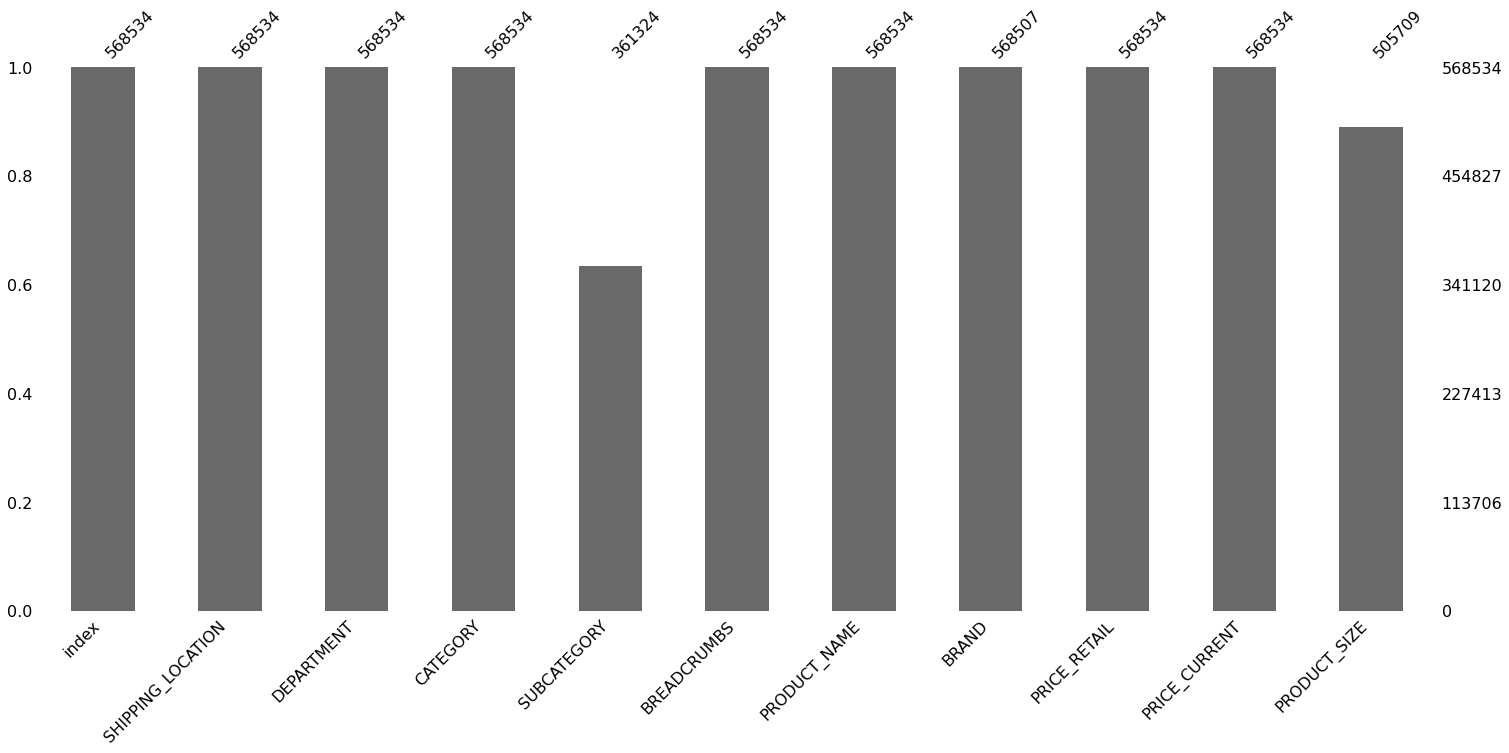

In [11]:
# Visualizing Missing values in the form of *Bar chart *
msno.bar(df)

<div class='alert alert-block alert-warning' style="font-size: 20pt; font-family: cursive; color: #08415C"> 
    <b> <center> 3. Analysis & Visualization </center> </b>
</div>

1. Shipping Location & Prices  
2. Department with maximum products
3. Products prices
4. Category available 
5. Brand Presence
6. Subcategory Presence
7. Departments & Categories

<div class='alert alert-block alert-info' style="font-size: 15pt; font-family: cursive; color: #08415C"> 
    <b> <center>1. Shipping Location - What location received the maximum amount of products & which location had the maximum Current Price</center> </b>
</div>

In [12]:
agg_functions = {'PRICE_CURRENT':['count','median', 'min','max']}
df.groupby('SHIPPING_LOCATION').agg(agg_functions)


PRICE_CURRENT                     
                          count median   min     max
SHIPPING_LOCATION                                   
6010                       9394  3.810  0.30  129.00
15601                     25226  3.840  0.23  198.00
23111                     24741  3.970  0.18  198.00
23223                     26011  3.940  0.17  198.00
30044                     22269  3.740  0.20   54.44
33012                     17170  3.640  0.21   47.61
33647                     26618  3.880  0.23  129.00
44035                     26116  3.960  0.17  198.00
45011                     24635  3.880  0.23  159.99
48180                     25202  3.940  0.20  198.00
53215                     24938  3.760  0.20  159.99
60007                     24551  3.960  0.18  129.00
63376                     21321  3.880  0.16   79.99
66062                     21425  3.800  0.20   54.44
70072                     24702  3.880  0.23  198.00
72034                     20454  3.780  0.16  129.00
75052                     25219  3.900  0.18  198.00
75211                     24422  3.780  0.18  129.00
77449                     25225  3.920  0.17  246.87
78130                     24084  3.880  0.18  159.99
79936                     19592  3.760  0.18   92.99
85225                     22465  3.880  0.17   84.48
89108                     19926  3.865  0.23   65.98
90650                     21947  3.940  0.18  109.98
94565                      9681  3.980  0.26  159.99
96797                     11200  4.180  0.18  116.00

- Shipping Locatons <b> 33647 ,44035 </b> have the highest product supply closely followed by other locations
- With the help of the aggregate variable, we figured out that median prices in shipping location no. <b> 96797, 94565, 23111 </b>are the highest among the other Shipping Locations.

<div class='alert alert-block alert-warning' style="font-size: 10pt; font-family: cursive; color: #000000"> 
    <right> Need help with sorting median in Descending order for the table above!!</right>
</div>

<div class='alert alert-block alert-info' style="font-size: 15pt; font-family: cursive; color: #08415C"> 
    <b> <center>2. Department with Maximum Products - Which Department have the maximum products availability?</center> </b>
</div>

In [13]:
df_dept = df['DEPARTMENT'].value_counts()
df_dept

Pantry                116385
Breakfast & Cereal     71995
Beverages              52293
Frozen                 48891
Snacks                 43312
Meat & Seafood         41313
Candy                  37721
Dairy & Eggs           31546
Bakery & Bread         26657
Deli                   25883
Coffee                 21974
Baking                 21502
Fresh Produce          16567
Alcohol                12495
Name: DEPARTMENT, dtype: int64

##### Bar Chart - Product availability

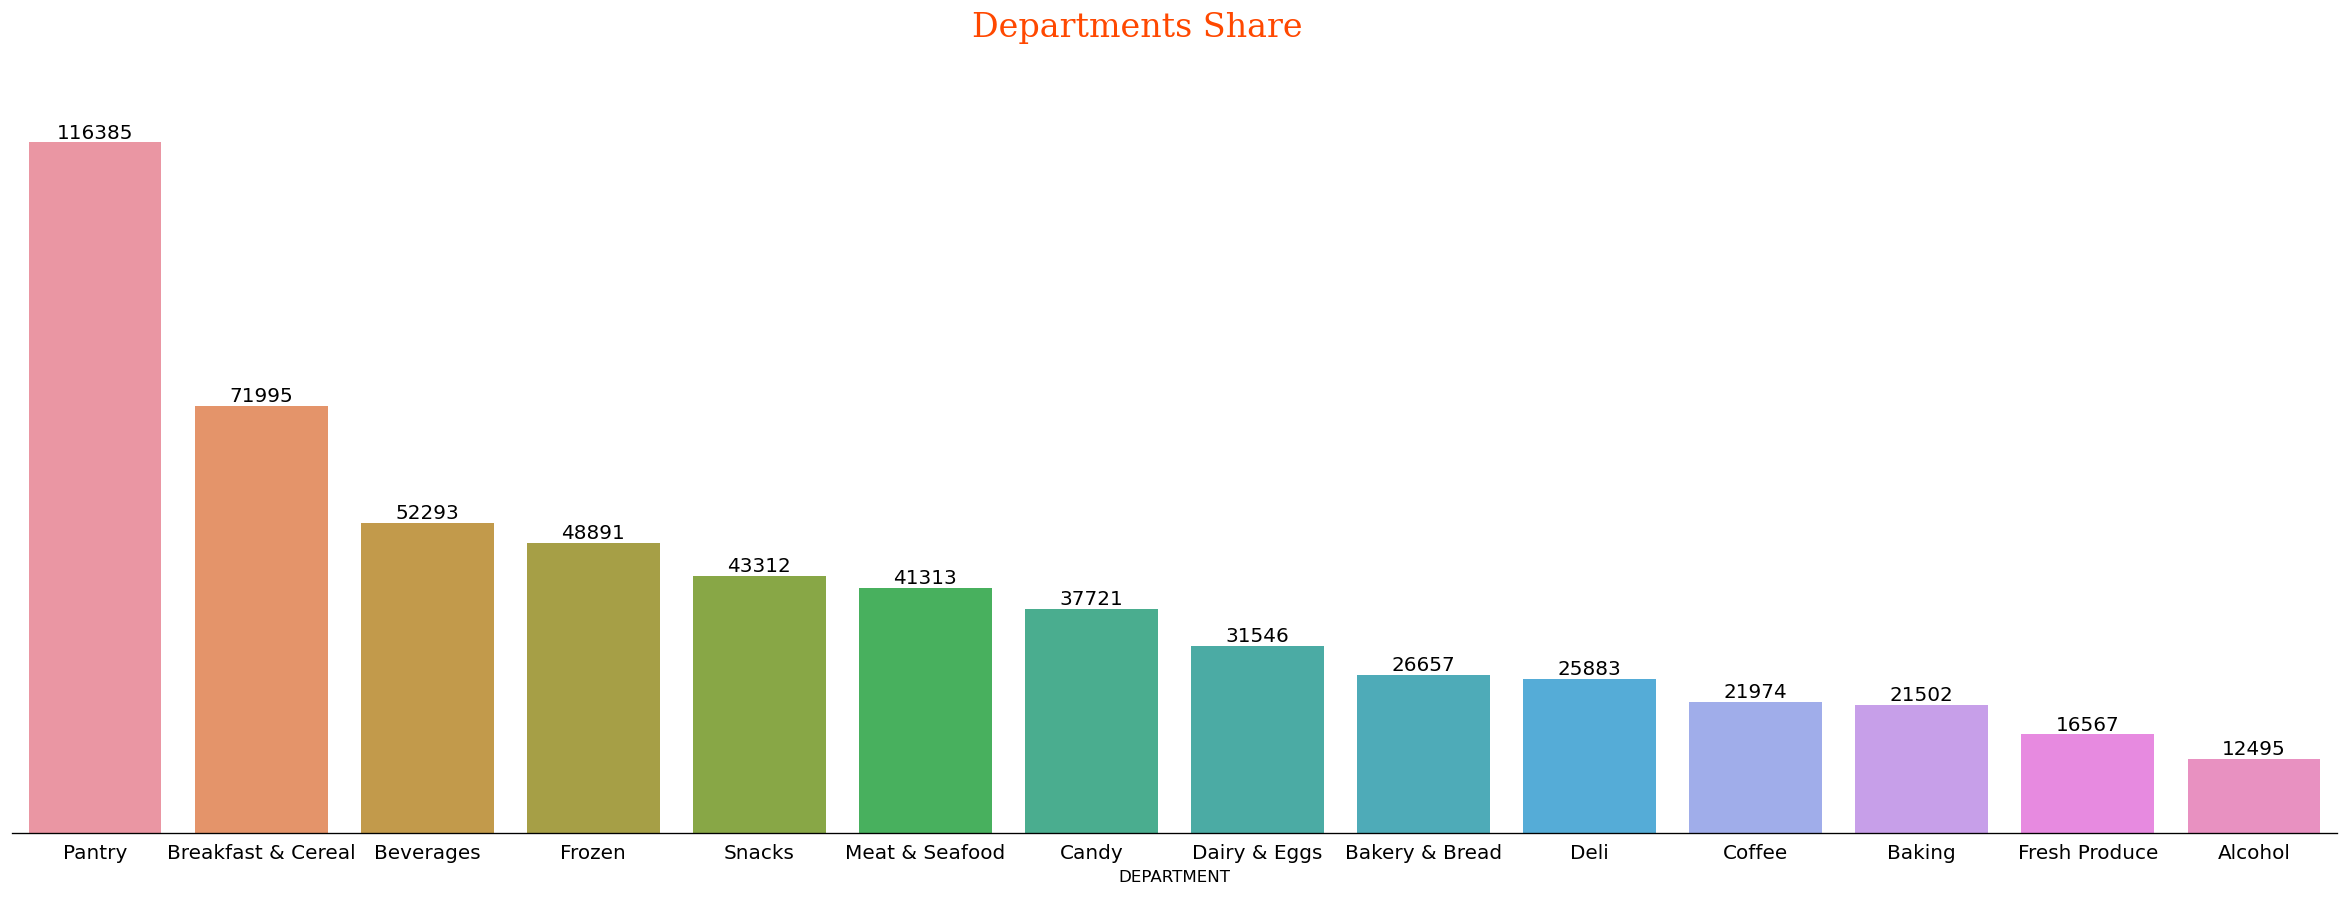

In [14]:
#BAR Calculation
df_dept = df['DEPARTMENT'].value_counts() #calculation 
fig, ax = plt.subplots(figsize = [25,8], dpi = 120) #plot size

#modifying spines of the chart
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['left'].set_visible(False)
ax.spines['bottom'].set_visible(True)
ax.tick_params(bottom = False)
ax.get_yaxis().set_visible(False)


#Sorting and Creating barchart
descending_order = df.groupby('DEPARTMENT').size().sort_values().index[::-1]
sns.countplot(data = df, x = 'DEPARTMENT', order = descending_order, ax = ax)

#add values on top of each bar
ax.bar_label(ax.containers[0], fontsize = 12)
fig.suptitle('Departments Share', fontfamily='serif', fontsize = 20, color = '#ff4800');

#changing font size of ticks on the x-axis
for tick in ax.xaxis.get_major_ticks():
    tick.label.set_fontsize(12)
    
#changing font size of ticks in legend (not present here) - this can be ignored
#ax.legend(prop = dict(size =12))

Walmart has the maximum availability of Pantry items followed by Breakfast & Cereals

<div class='alert alert-block alert-info' style="font-size: 15pt; font-family: cursive; color: #08415C"> 
    <b> <center>3. Product Prices - Products with maximum price range</center> </b>
</div>

Categorizing products in different price range:
- Low_range = 0-10
- Low_Mid_range = 10-30
- Mid_range = 30-80
- High_range = 80+

In [15]:
df.loc[(df['PRICE_CURRENT'] > 0) & (df['PRICE_CURRENT'] <= 10), 'PRICE_RANGE'] = 'Low_Range'

In [16]:
df.loc[(df['PRICE_CURRENT'] > 10) & (df['PRICE_CURRENT'] <= 30), 'PRICE_RANGE'] = 'Low_Mid_Range'

In [17]:
df.loc[(df['PRICE_CURRENT'] > 30) & (df['PRICE_CURRENT'] <= 80), 'PRICE_RANGE'] = 'Mid_Range'

In [18]:
df.loc[(df['PRICE_CURRENT'] > 80), 'PRICE_RANGE'] = 'High_Range'

In [19]:
df['PRICE_RANGE'].value_counts(dropna = False)

Low_Range        516487
Low_Mid_Range     50594
Mid_Range          1285
High_Range          168
Name: PRICE_RANGE, dtype: int64

##### Pie Chart - Product range

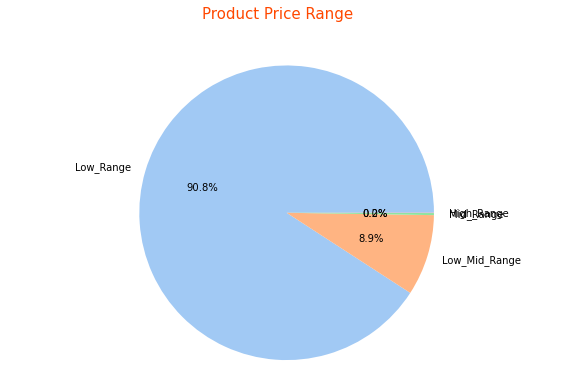

In [20]:
#Pie calculation
pie_df = df['PRICE_RANGE'].value_counts
fig, (ax) = plt.subplots(1, figsize = (10,6))

#choosing color palette
palette_color = sns.color_palette('pastel')

#creating pie chart
ax.pie(df['PRICE_RANGE'].value_counts().values, labels = df['PRICE_RANGE'].value_counts().index, colors = palette_color, 
      autopct = '%0.1f%%')
ax.axis('equal')

fig.suptitle('Product Price Range', fontsize=15, color = '#ff4800');

90% of the products in the walmart store are from the low range products

<div class='alert alert-block alert-warning' style="font-size: 10pt; font-family: cursive; color: #000000"> 
    <justified> Need help me with wrap the Mid_Range and High_range texts!! </justified>
</div>

#### Creating Box Plot to understand the product range department wise

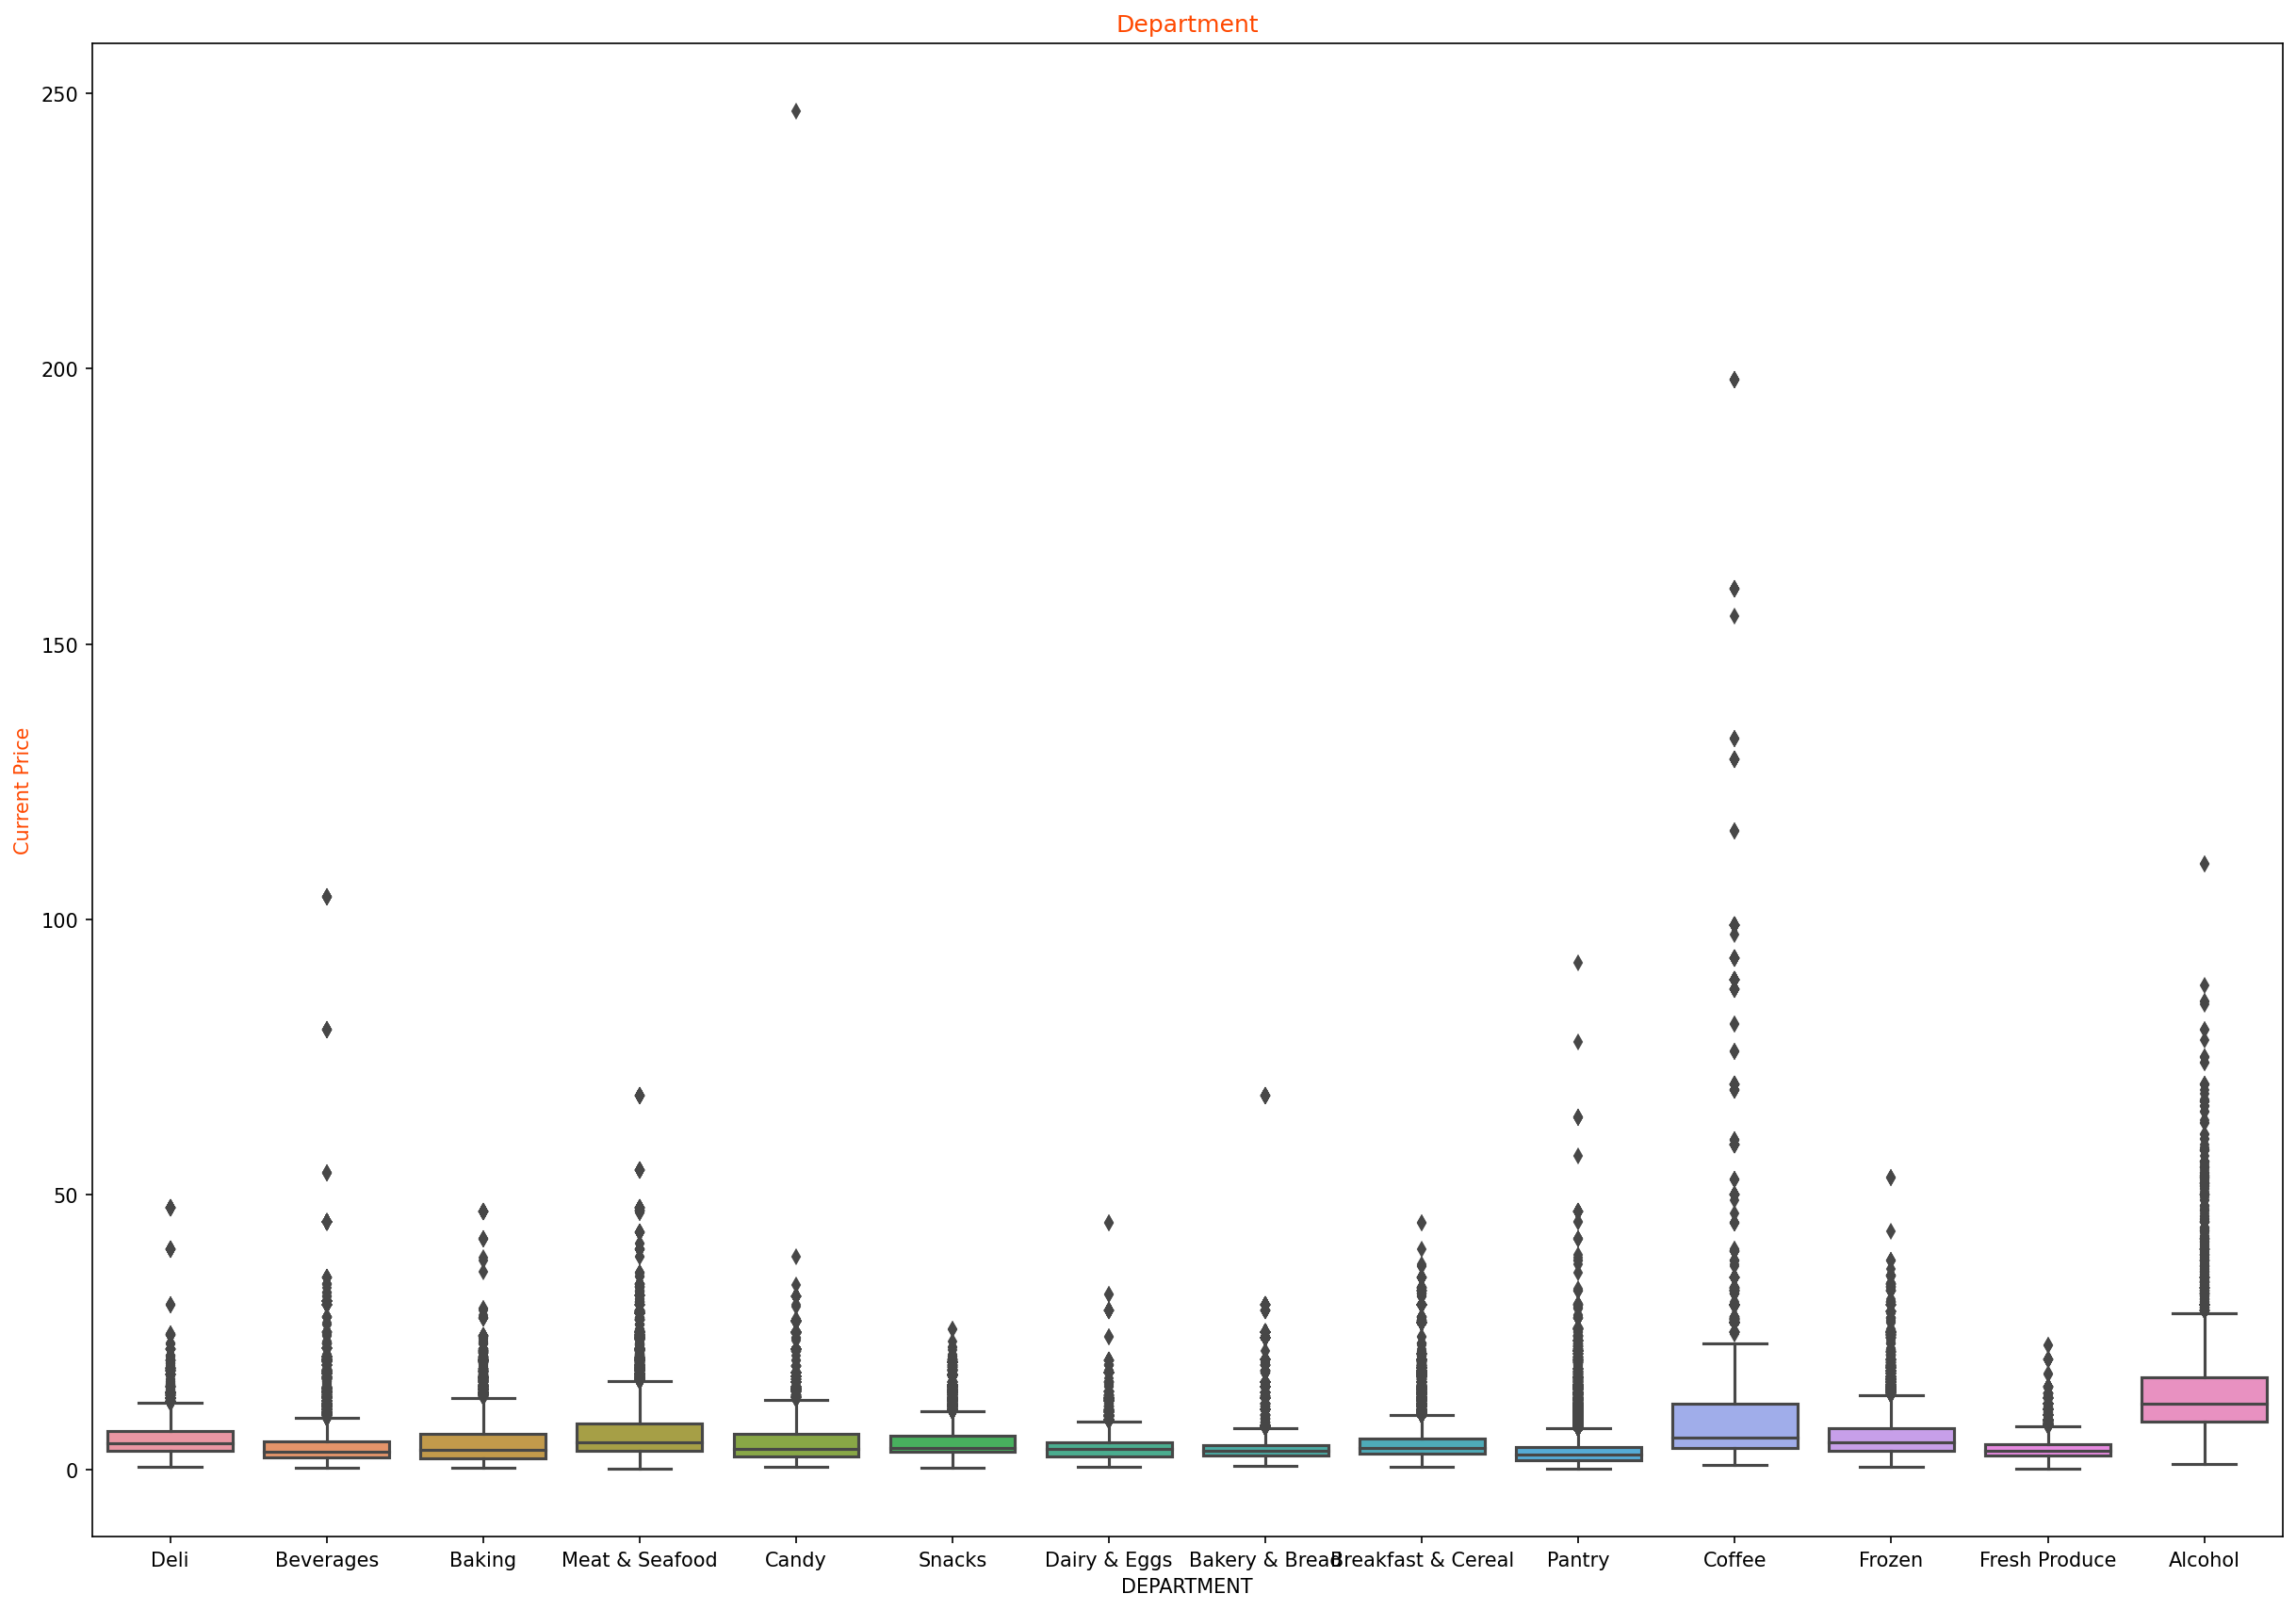

In [21]:
plt.figure(figsize = (20,14), dpi = 150)
sns.boxplot(data=df, y='PRICE_CURRENT', x='DEPARTMENT');
plt.ylabel('Current Price', color = '#ff4800')
plt.title('Department', color = '#ff4800');

Few Observations:
- Median price of Alcohol, Coffee, Frozen products, Meat & SeaFood are higher as compared to other products
- Coffee Products have a variety of price range (outliers) followed by Alcohol and Beverages
- Snacks, Dairy,Fresh produce, bakery products and candy have a low box plot range 
- Candy has a huge outlier present which might be due to human error


#### Price Analysis w.r.t Departments with the help of Line Chart

In [22]:
df_dept2 = df[['DEPARTMENT', 'PRICE_CURRENT']]

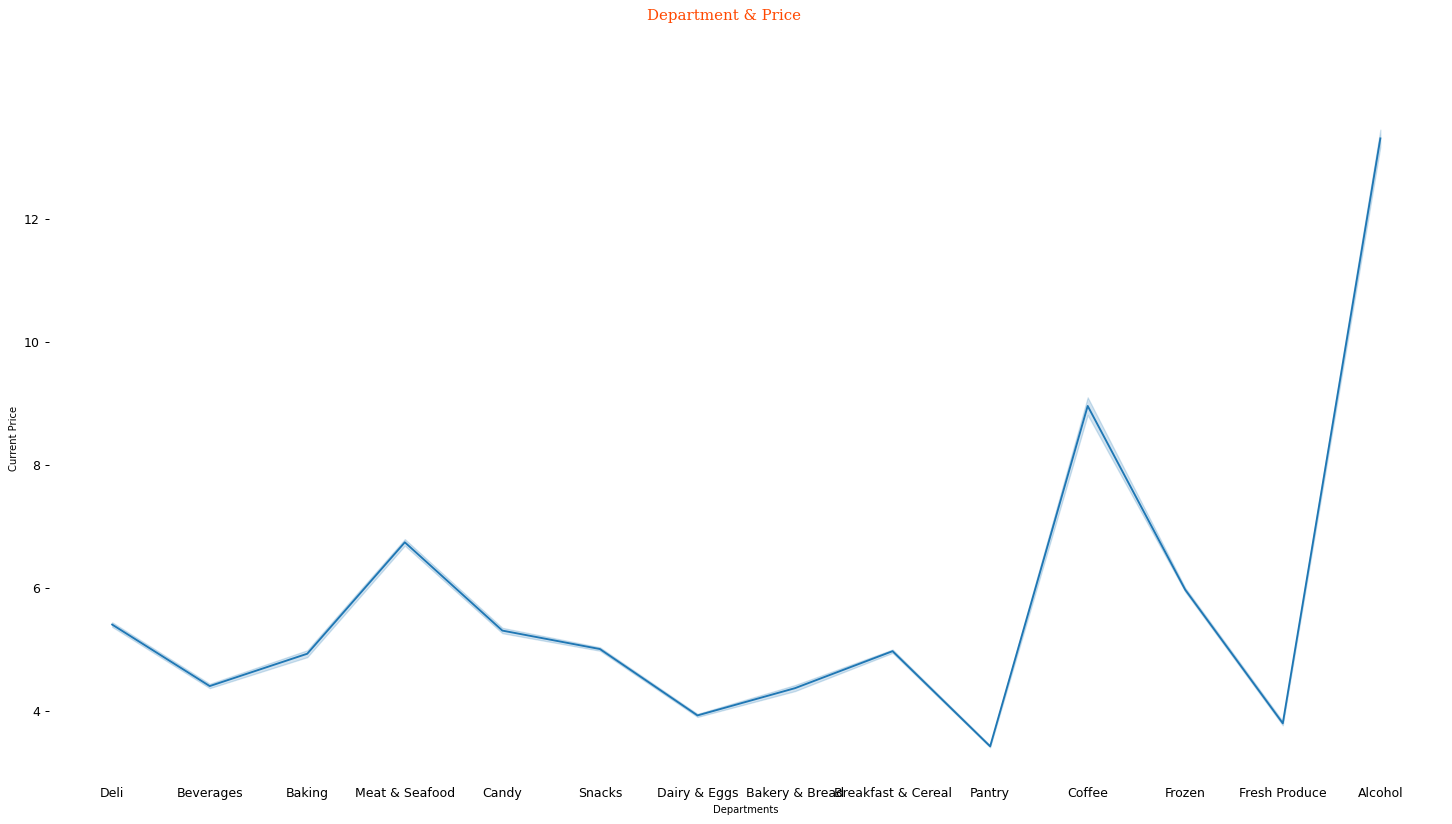

In [23]:
#Bar Calculation
df_dept2 #calculation 
fig, ax = plt.subplots(figsize = [20,10], dpi = 90) #plot size

#modifying spines of the chart
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['left'].set_visible(False)
ax.spines['bottom'].set_visible(False)
ax.tick_params(bottom = False)

#Sorting and Creating horizontal barchart
sns.lineplot(data = df, x = 'DEPARTMENT', y = 'PRICE_CURRENT', ax = ax) 

#add values on each bar
fig.suptitle('Department & Price', fontfamily='serif', fontsize = 12, color = '#ff4800')

#changing font size of the x and y axis labels
plt.ylabel('Current Price', fontsize=8)
plt.xlabel('Departments', fontsize = 8);


<div class='alert alert-block alert-info' style="font-size: 15pt; font-family: cursive; color: #08415C"> 
    <b> <center>4. Category Available - Maximum category available in the store </center> </b>
</div>

In [24]:
df['CATEGORY'].value_counts()

Fresh Food             36049
Breakfast Beverages    31363
Condiments             25530
Dairy & Eggs           20453
Canned goods           18515
                       ...  
Fresh Pasta              344
Fresh Flowers            323
Fresh Dressings          302
Yeast                    237
Rotisserie Chicken       113
Name: CATEGORY, Length: 114, dtype: int64

 Rotisserie Chicken, Yeast, Fresh Dressings and Flowers are limited available in the store

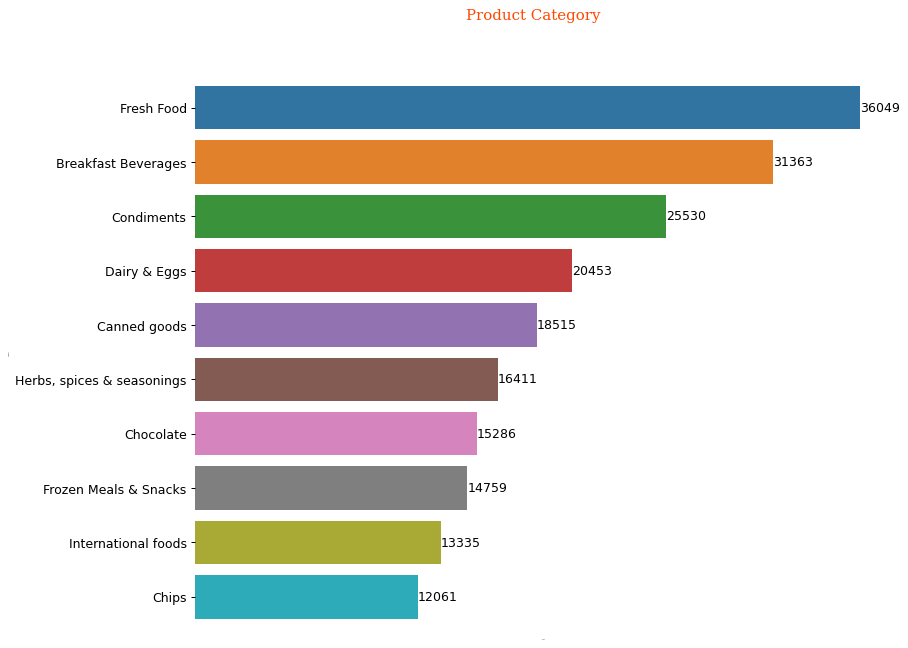

In [25]:
#Top 10 Categories present in the store
#Horizontal Bar Calculation
df_category = df['CATEGORY'].value_counts() #calculation 
fig, ax = plt.subplots(figsize = [10,8], dpi = 90) #plot size

#modifying spines of the chart
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['left'].set_visible(False)
ax.spines['bottom'].set_visible(False)
ax.tick_params(bottom = False)
ax.set(xticklabels=[]) # Removed x-axis numbers, as it is not required here for this horizontal bar chart

#Sorting and Creating horizontal barchart
descending_order = df.groupby('CATEGORY').size().sort_values().index[::-1] #"[::-1] tells us the data order with 1 gap"
sns.countplot(data = df, y = 'CATEGORY', order = descending_order[0:10], ax = ax) 
#"descending_order[0:10] - limits the data to top 10 categories only"

#add values on each bar
ax.bar_label(ax.containers[0], fontsize = 10)
fig.suptitle('Product Category', fontfamily='serif', fontsize = 12, color = '#ff4800');

#changing font size of ticks on the y-axis
for tick in ax.yaxis.get_major_ticks():
    tick.label.set_fontsize(10)
    
#changing font size of the x and y axis labels
plt.xlabel('Count', fontsize=0)
plt.ylabel('Category', fontsize = 0);


Fresh Food, Breakfast Beverages, Condinments, Dairy & Egg have the maximum avalability in the store

###### Box chart of these "Top 10" Categories to see their price range

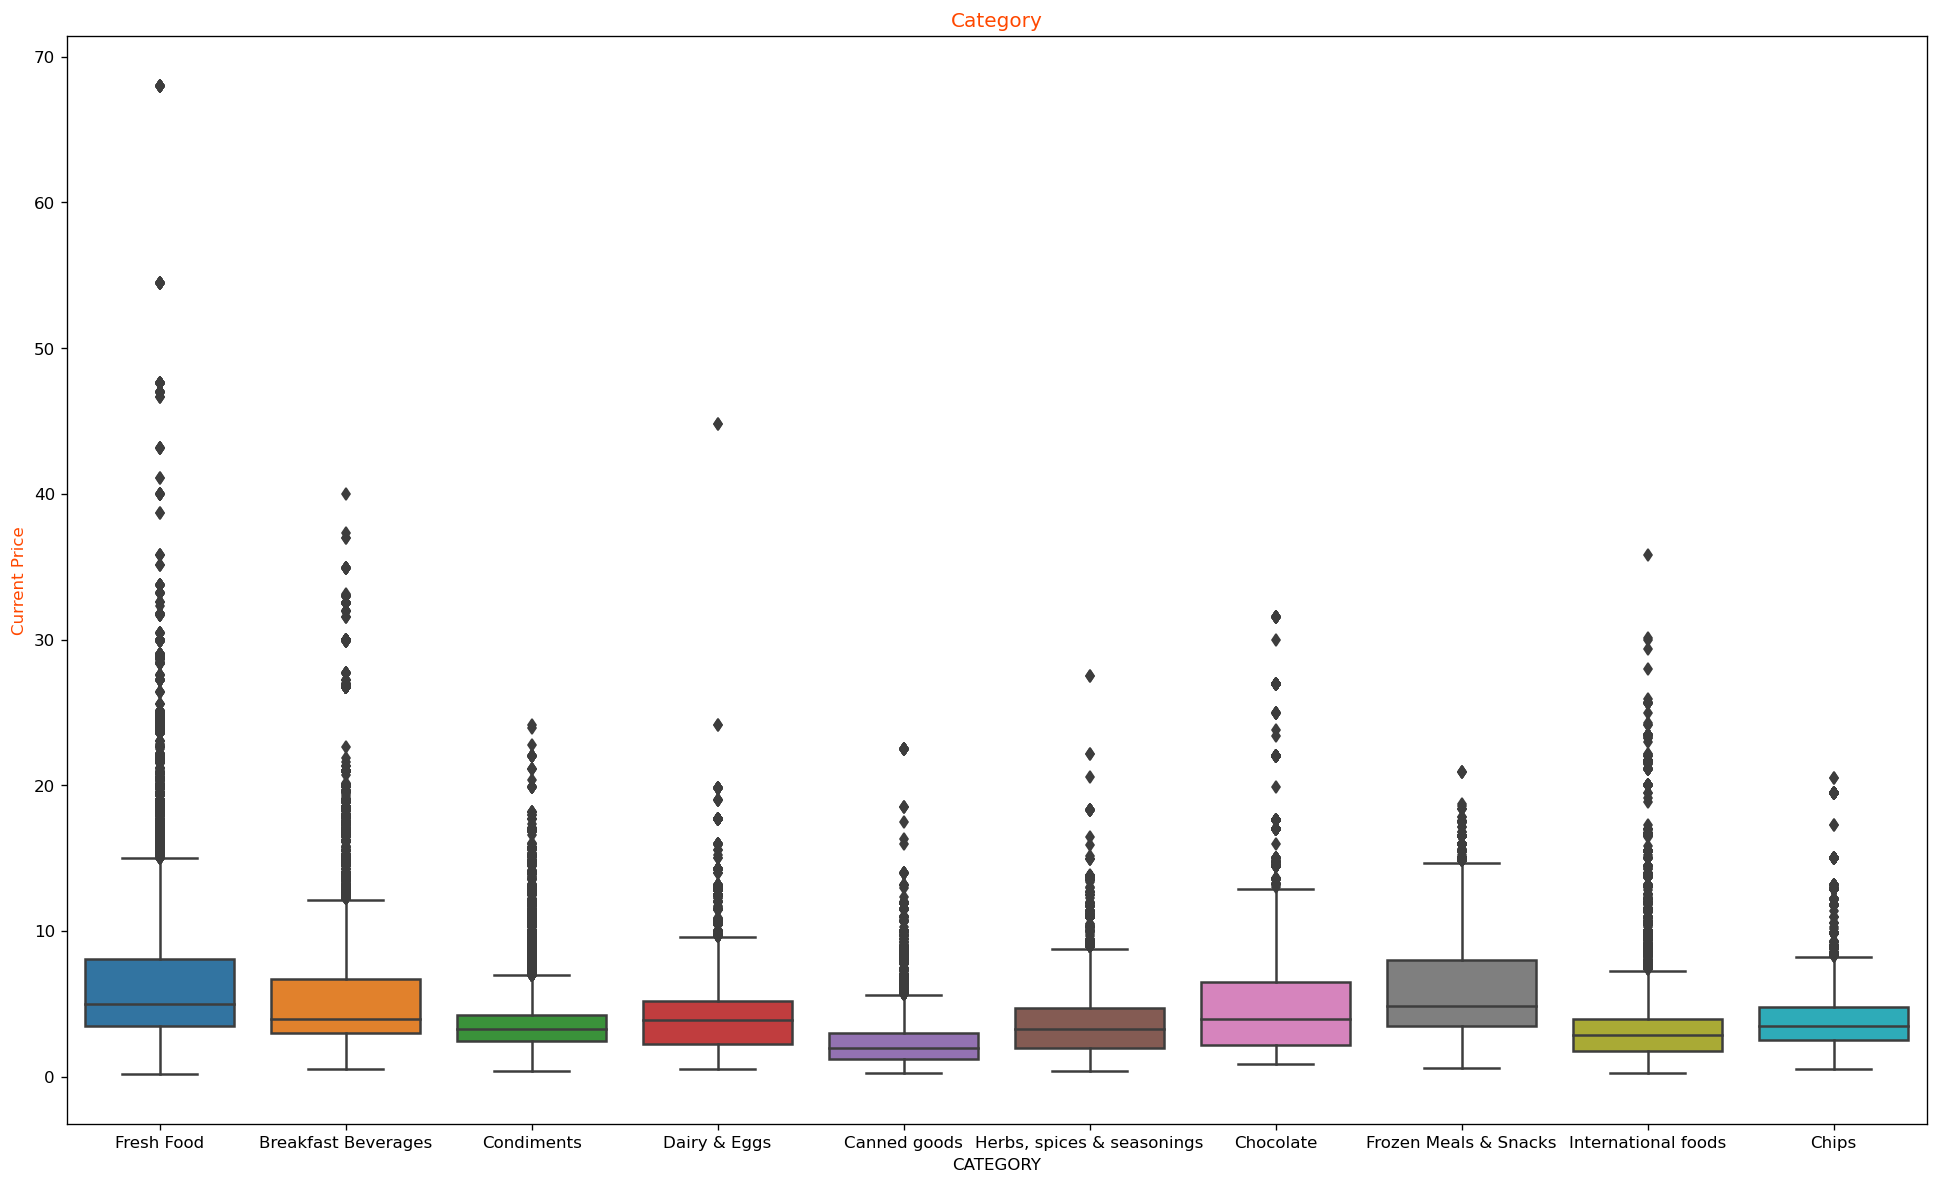

In [26]:
plt.figure(figsize = (20,12), dpi = 120)

plot_order = df.groupby('CATEGORY').size().sort_values().index[::-1] #"[::-1] tells us the data order with 1 gap"
sns.boxplot(data=df, y='PRICE_CURRENT', x='CATEGORY', order = plot_order[0:10]) 

#Add - flierprops = dict(markerfacecolor = '0.50', markersize = 2) - for changing outliers style

plt.ylabel('Current Price', color = '#ff4800')
plt.title('Category', color = '#ff4800');

Few Observations:
- Most of the items in these "Top 10 product catgeories" lie in low to low-middle price range (i.e. 0-30 range)
- Fresh Food has the maximum product price range
- Chocolates, Frozen Meals & Snacks have a higher price range (and median) among the top 10 catgeories
- Chips have a higher median as compared to International Foods, although Price of some of the international foods are much higher than other food products

<div class='alert alert-block alert-info' style="font-size: 15pt; font-family: cursive; color: #08415C"> 
    <b> <center>5. Brand Presence - What brands are mainly available at the Walmart store? </center> </b>
</div>

In [27]:
df['BRAND'].value_counts()

Great Value             80387
Freshness Guaranteed    17815
Marketside              15772
PRODUCE UNBRANDED        8643
Kraft                    4561
                        ...  
Il Poggione                 1
MOUNT VEEDER                1
Chalet Debonne              1
Earthquake                  1
Ole Orleans                 1
Name: BRAND, Length: 4368, dtype: int64

##### Top 5 Brands in the Walmart store

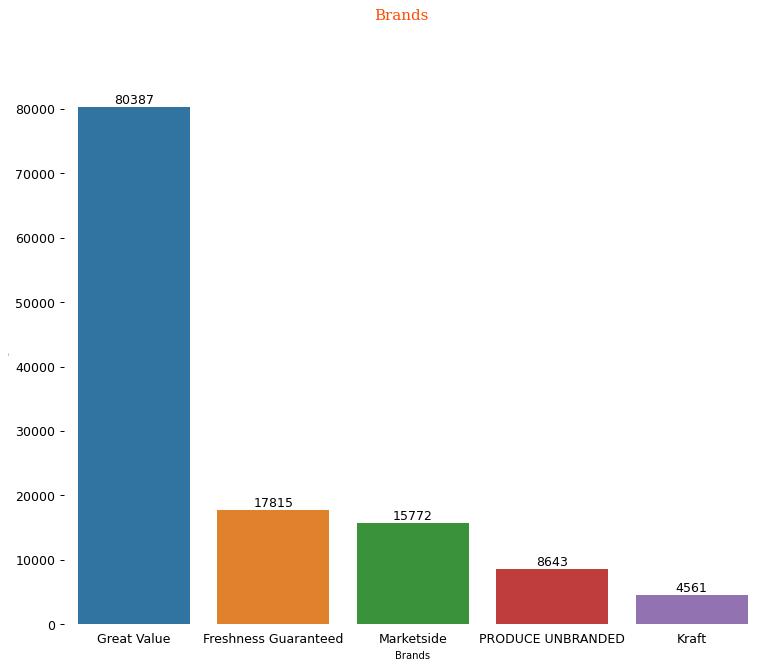

In [28]:
#Bar Calculation
df_brands = df['BRAND'].value_counts() #calculation 
fig, ax = plt.subplots(figsize = [10,8], dpi = 90) #plot size

#modifying spines of the chart
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['left'].set_visible(False)
ax.spines['bottom'].set_visible(False)
ax.tick_params(bottom = False)

#Sorting and Creating horizontal barchart
descending_order = df.groupby('BRAND').size().sort_values().index[::-1]
sns.countplot(data = df, x = 'BRAND', order = descending_order[0:5], ax = ax) 

#add values on each bar
ax.bar_label(ax.containers[0], fontsize = 10)
fig.suptitle('Brands', fontfamily='serif', fontsize = 12, color = '#ff4800');

#changing font size of ticks on the y-axis
for tick in ax.xaxis.get_major_ticks():
    tick.label.set_fontsize(10)
    
#changing font size of the x and y axis labels
plt.ylabel('Count', fontsize=0)
plt.xlabel('Brands', fontsize = 8);

It is very clear that "Great Value" a Walmart inhouse brand leads the numbers of products in the Walmart Store

<div class='alert alert-block alert-info' style="font-size: 15pt; font-family: cursive; color: #08415C"> 
    <b> <center>6. Subcategory Presence </center> </b>
</div>

In [29]:
df['SUBCATEGORY'].value_counts()

Shop all            205218
Juice                11812
Cheese               11466
Coffee               10932
Yogurt                6928
                     ...  
Brandy & Cognac         50
Red Rose                30
Emergency food          28
Pukka Tea                9
Cake Decorations         6
Name: SUBCATEGORY, Length: 124, dtype: int64

In [30]:
#Top 10 Subcategories in Walmart

df['SUBCATEGORY'].value_counts()[0:10]

Shop all              205218
Juice                  11812
Cheese                 11466
Coffee                 10932
Yogurt                  6928
Tea                     6591
Deli meat & cheese      4518
Fresh vegetables        4432
Pork                    3800
Cake and cupcakes       3383
Name: SUBCATEGORY, dtype: int64

Subcategory "Shop all" has the maximum variety under its name in the walmart stores

<div class='alert alert-block alert-info' style="font-size: 15pt; font-family: cursive; color: #08415C"> 
    <b> <center>7. Departments & Categories</center> </b>
</div>

In [31]:
"""What categories correspond to what department
This can help us to know which category of product is maximum in which department"""

Categories = pd.DataFrame(df.groupby(['DEPARTMENT']).apply(lambda df: df['CATEGORY'].value_counts()))

In [32]:
Categories

CATEGORY
DEPARTMENT                                  
Alcohol        Wine                     6496
               Beer                     3444
               Spirits                  2555
Bakery & Bread Sweet Treats             4405
               Rolls & Buns             4221
...                                      ...
Snacks         Pretzels                 1569
               Beef Jerky               1545
               Snack Nuts                708
               Meat Sticks               683
               Variety Pack Snacks       591

[116 rows x 1 columns]

<div class='alert alert-block alert-warning' style="font-size: 10pt; font-family: cursive; color: #000000"> 
    <justified> Unable to show complete rows, sometimes it works sometimes it does not. Even with "categories.options.display.max_rows = None" command it is showng errors!! </justified>
</div>

In [41]:
#Exporting Data to csv
df.to_csv(os.path.join(r'C:\Users\iNDIA\Desktop\Data Analytics\Projects\Walmart Products', 'Walmart Products.csv'))

<div class='alert alert-block alert-info' style="font-size: 14pt; font-family: verdana; color: #08415C"> 
     Credits
    <ul>
        <li style="font-size: 12pt"><a href="https://www.kaggle.com/datasets/thedevastator/product-prices-and-sizes-from-walmart-grocery" >Kaggle</a></li>
        <li style="font-size: 12pt"><a href="https://data.world/xfu022">Dataset Credits - Jeff </a></li>
    </ul>
</div>

## THE END